In [1]:
import numpy as np
import pandas as pd 
import re

In [2]:
df1= pd.read_csv('df4.csv')
df1

,Unnamed: 0,author,date,Topic,Subcat1,Subcat2
0,0,ikorodureporta,6:32am,"Governor Wike Links Opobo Kingdom By Road, Af...",General,Politics
1,1,naptu2,8:15am On Dec 29,Ajara Njoya Nchout Joins Atletico Madrid. (13...,Entertainment,Sports
2,2,vicmbosowo,10:01pm On Dec 28,COVID-19 Lockdown: 500 Secondary School Stude...,General,Education
3,3,Palmerbarry,8:10pm On Dec 28,How I Got Badly Disgraced By Sokoloan (32733 ...,General,Business
4,4,Easyincome24,10:07am On Dec 28,(10487 Views),General,Travel
...,...,...,...,...,...,...
24228,24228,AllNews1,4:45am On Jan 04,Gibram Cruz Mother's Deportation To Mexico By...,General,Travel
24229,24229,hotmediatv,5:31am On Jan 04,Hushpuppi And His Son Go For Shopping In Duba...,Entertainment,Celebrities
24230,24230,Sunofgod,1:41am On Jan 04,Nnamdi Kanu Reacts To Nigerian Muslims Chanti...,General,Politics
24231,24231,Explorers,9:18pm On Jan 03,(116932 Views),General,Politics


In [3]:
df2= pd.read_csv('df4.csv')
df2.drop('Unnamed: 0',axis =1,inplace =True)

Creating helper functions for date and time

In [4]:
def time(x):
    b1= x.split(' ')
    
    return b1[0]

def month(x):
    b1= x.split(' ')
    if len(b1)==1:
        return 'Dec'
    else:
        return b1[2]

def day(x):
    b1= x.split(' ')
    if len(b1)==1:
        return '30'
    else:
        return b1[3]

def Year(x):
    b1= x.split(' ')
    if len(b1)<5:
        return '2020'
    else:
        return b1[4]    


In [5]:
df2['Time'] =df2['date'].apply(time)
df2['Day'] =df2['date'].apply(day)
df2['month'] =df2['date'].apply(month)
df2['Year'] =df2['date'].apply(Year)
df2

,author,date,Topic,Subcat1,Subcat2,Time,Day,month,Year
0,ikorodureporta,6:32am,"Governor Wike Links Opobo Kingdom By Road, Af...",General,Politics,6:32am,30,Dec,2020
1,naptu2,8:15am On Dec 29,Ajara Njoya Nchout Joins Atletico Madrid. (13...,Entertainment,Sports,8:15am,29,Dec,2020
2,vicmbosowo,10:01pm On Dec 28,COVID-19 Lockdown: 500 Secondary School Stude...,General,Education,10:01pm,28,Dec,2020
3,Palmerbarry,8:10pm On Dec 28,How I Got Badly Disgraced By Sokoloan (32733 ...,General,Business,8:10pm,28,Dec,2020
4,Easyincome24,10:07am On Dec 28,(10487 Views),General,Travel,10:07am,28,Dec,2020
...,...,...,...,...,...,...,...,...,...
24228,AllNews1,4:45am On Jan 04,Gibram Cruz Mother's Deportation To Mexico By...,General,Travel,4:45am,04,Jan,2020
24229,hotmediatv,5:31am On Jan 04,Hushpuppi And His Son Go For Shopping In Duba...,Entertainment,Celebrities,5:31am,04,Jan,2020
24230,Sunofgod,1:41am On Jan 04,Nnamdi Kanu Reacts To Nigerian Muslims Chanti...,General,Politics,1:41am,04,Jan,2020
24231,Explorers,9:18pm On Jan 03,(116932 Views),General,Politics,9:18pm,03,Jan,2020


In [6]:
#Cleaning the topic column
def Topic(x):
    b1= x.split('(')
    return b1[0]
#Creating the Views column from the topic column
def Views(x):
    b1 = x.split('(')
    views =  b1[1]
    views_split = views.split(' ')
    return views_split[0]


In [7]:
df2['Veiws'] = df2['Topic'].apply(Views)
df2['Topic'] =df2['Topic'].apply(Topic)

In [8]:
df2

,author,date,Topic,Subcat1,Subcat2,Time,Day,month,Year,Veiws
0,ikorodureporta,6:32am,"Governor Wike Links Opobo Kingdom By Road, Af...",General,Politics,6:32am,30,Dec,2020,39933
1,naptu2,8:15am On Dec 29,Ajara Njoya Nchout Joins Atletico Madrid.,Entertainment,Sports,8:15am,29,Dec,2020,13958
2,vicmbosowo,10:01pm On Dec 28,COVID-19 Lockdown: 500 Secondary School Stude...,General,Education,10:01pm,28,Dec,2020,37506
3,Palmerbarry,8:10pm On Dec 28,How I Got Badly Disgraced By Sokoloan,General,Business,8:10pm,28,Dec,2020,32733
4,Easyincome24,10:07am On Dec 28,,General,Travel,10:07am,28,Dec,2020,10487
...,...,...,...,...,...,...,...,...,...,...
24228,AllNews1,4:45am On Jan 04,Gibram Cruz Mother's Deportation To Mexico By...,General,Travel,4:45am,04,Jan,2020,70428
24229,hotmediatv,5:31am On Jan 04,Hushpuppi And His Son Go For Shopping In Dubai,Entertainment,Celebrities,5:31am,04,Jan,2020,61354
24230,Sunofgod,1:41am On Jan 04,Nnamdi Kanu Reacts To Nigerian Muslims Chanti...,General,Politics,1:41am,04,Jan,2020,52883
24231,Explorers,9:18pm On Jan 03,,General,Politics,9:18pm,03,Jan,2020,116932


I think that the scrapper must have scrapped the advertisement topic more than more.

In [9]:
df2[df2['Year']=='2012']

,author,date,Topic,Subcat1,Subcat2,Time,Day,month,Year,Veiws
64,Seun,"2:17am On Sep 16, 2012",How To Place Targeted Ads On Nairaland,General,Nairaland Ads,2:17am,"16,",Sep,2012,20020844
129,Seun,"2:17am On Sep 16, 2012",How To Place Targeted Ads On Nairaland,General,Nairaland Ads,2:17am,"16,",Sep,2012,20020844
194,Seun,"2:17am On Sep 16, 2012",How To Place Targeted Ads On Nairaland,General,Nairaland Ads,2:17am,"16,",Sep,2012,20020844
259,Seun,"2:17am On Sep 16, 2012",How To Place Targeted Ads On Nairaland,General,Nairaland Ads,2:17am,"16,",Sep,2012,20020844
324,Seun,"2:17am On Sep 16, 2012",How To Place Targeted Ads On Nairaland,General,Nairaland Ads,2:17am,"16,",Sep,2012,20020844
...,...,...,...,...,...,...,...,...,...,...
23949,Seun,"2:17am On Sep 16, 2012",How To Place Targeted Ads On Nairaland,General,Nairaland Ads,2:17am,"16,",Sep,2012,20021533
24013,Seun,"2:17am On Sep 16, 2012",How To Place Targeted Ads On Nairaland,General,Nairaland Ads,2:17am,"16,",Sep,2012,20021533
24078,Seun,"2:17am On Sep 16, 2012",How To Place Targeted Ads On Nairaland,General,Nairaland Ads,2:17am,"16,",Sep,2012,20021540
24143,Seun,"2:17am On Sep 16, 2012",How To Place Targeted Ads On Nairaland,General,Nairaland Ads,2:17am,"16,",Sep,2012,20021540


Am correct and it also need to be removed

In [10]:
rows = df2[df2['Year']=='2012'].index
df2 = df2.drop(rows,axis=0)
df2[df2['author']=='Seun']

,author,date,Topic,Subcat1,Subcat2,Time,Day,month,Year,Veiws
2920,Seun,9:22pm On Nov 25,Lekki Shooting: We Wouldn't Do Anything Diffe...,General,Politics,9:22pm,25,Nov,2020,19684
5667,Seun,1:17pm On Oct 20,Processions In Lagos State,General,Politics,1:17pm,20,Oct,2020,37477
5783,Seun,11:10pm On Oct 18,Sanwo-Olu Explains The Judicial Panel Of Inqu...,General,Politics,11:10pm,18,Oct,2020,17107
14415,Seun,4:05pm On Jun 16,Dexamethasone Saves Severely Ill COVID-19 Pat...,General,Health,4:05pm,16,Jun,2020,32251
18343,Seun,10:01pm On Apr 14,Interview With A South Korean Ambassador On C...,General,Health,10:01pm,14,Apr,2020,28743
18478,Seun,11:00pm On Apr 12,Other African Countries,General,Health,11:00pm,12,Apr,2020,52951
18930,Seun,8:52am On Apr 04,The Coronavirus Seems To Like Cold Weather,General,Health,8:52am,04,Apr,2020,66850
18961,Seun,11:09am On Apr 04,- US CDC To Americans,General,Health,11:09am,04,Apr,2020,19312
23076,Seun,9:16am On Jan 24,Naomi Osaka Vs 'Coco' Gauff At Australian Ope...,Entertainment,Sports,9:16am,24,Jan,2020,16591
23906,Seun,9:06am On Jan 09,s Witnesses Over Blood Transfusion,General,Religion,9:06am,09,Jan,2020,33552


In [11]:
df2_new =df2.drop('date', axis =1).reset_index(drop =True)

In [12]:
df2_new

,author,Topic,Subcat1,Subcat2,Time,Day,month,Year,Veiws
0,ikorodureporta,"Governor Wike Links Opobo Kingdom By Road, Af...",General,Politics,6:32am,30,Dec,2020,39933
1,naptu2,Ajara Njoya Nchout Joins Atletico Madrid.,Entertainment,Sports,8:15am,29,Dec,2020,13958
2,vicmbosowo,COVID-19 Lockdown: 500 Secondary School Stude...,General,Education,10:01pm,28,Dec,2020,37506
3,Palmerbarry,How I Got Badly Disgraced By Sokoloan,General,Business,8:10pm,28,Dec,2020,32733
4,Easyincome24,,General,Travel,10:07am,28,Dec,2020,10487
...,...,...,...,...,...,...,...,...,...
23855,AllNews1,Gibram Cruz Mother's Deportation To Mexico By...,General,Travel,4:45am,04,Jan,2020,70428
23856,hotmediatv,Hushpuppi And His Son Go For Shopping In Dubai,Entertainment,Celebrities,5:31am,04,Jan,2020,61354
23857,Sunofgod,Nnamdi Kanu Reacts To Nigerian Muslims Chanti...,General,Politics,1:41am,04,Jan,2020,52883
23858,Explorers,,General,Politics,9:18pm,03,Jan,2020,116932


Converting the dates to pandas datatime

In [13]:
df2['date_main'] = df2['Time']+' '+df2['Day']+' '+df2['month']+' ' +df2['Year'].astype(str)
df2['date_main'] = pd.to_datetime(df2['date_main'])

In [14]:
df2_new =df2.drop(['date','Time','Day','month', 'Year'], axis =1)
df2_new.to_csv('df2_new.csv',index=False)

Checking in the Values in subcat1 is correct as expected

In [15]:
df2.Subcat1.unique()

array([' General ', ' Entertainment ', ' General  ', 'Technology ',
       'Technology  ', ' Entertainment  '], dtype=object)

In [16]:
def cleaning(word):
    string = type('word')
    if type(word)==string:
        splited = word.split()
        return ' '.join(splited)
df2['Subcat1'] = df2.Subcat1.apply(cleaning)
df2['Subcat2'] = df2.Subcat2.apply(cleaning)

In [17]:
m = {'Technology':'Science/Technology'}
df2.Subcat1 =df2.Subcat1.replace(m)

In [18]:
df2.Subcat1.unique()

array(['General', 'Entertainment', 'Science/Technology'], dtype=object)

In [19]:
pd.to_datetime(df2['Time'])

0       2021-03-22 06:32:00
1       2021-03-22 08:15:00
2       2021-03-22 22:01:00
3       2021-03-22 20:10:00
4       2021-03-22 10:07:00
                ...        
24228   2021-03-22 04:45:00
24229   2021-03-22 05:31:00
24230   2021-03-22 01:41:00
24231   2021-03-22 21:18:00
24232   2021-03-22 22:13:00
Name: Time, Length: 23860, dtype: datetime64[ns]

<h3>Creating my first visualisation 

In [20]:
df2['Topic']
def word(x):
    wordx = []
    b1 =x.split(' ')
    for i in b1:
        if len(i)>3:
             wordx.append(i)
    return ' '.join(wordx)
bb =df2['Topic'].apply(word)    
bb

0        Governor Wike Links Opobo Kingdom Road, After ...
1                Ajara Njoya Nchout Joins Atletico Madrid.
2        COVID-19 Lockdown: Secondary School Students P...
3                                 Badly Disgraced Sokoloan
4                                                         
                               ...                        
24228    Gibram Cruz Mother's Deportation Mexico Army O...
24229                             Hushpuppi Shopping Dubai
24230    Nnamdi Kanu Reacts Nigerian Muslims Chanting D...
24231                                                     
24232              Fire Destroys Umuahia Industrial Market
Name: Topic, Length: 23860, dtype: object

In [21]:
text = " ".join(str(each) for each in bb)
text

'Governor Wike Links Opobo Kingdom Road, After Years Ajara Njoya Nchout Joins Atletico Madrid. COVID-19 Lockdown: Secondary School Students Pregnant Benin Badly Disgraced Sokoloan  Attack Buhari Draws More Criticism, Backing Sanofi Unveils Empowerment Programme, Calls Entry Lagos Chapter Directs Churches Close 11pm December Deeper Life High School Suspends Solomon Ndidi Over Molestation Pupil Protection. Leave Oshiomhole Your Predicament, Replies Philip Shaibu Southern, Middle Belt Leaders Back Kukah, Can\'t Suppress Voice Reason 13.5 Trillion Budget Buhari Commitment National Unity Gunmen Abduct Rivers Councillor, Demand N50m From Family COVID-19 Update December 2020 Nigeria Apapa Gridlock: Lagos Takeover Presidential Taskforce\'s Operation Send Shoutout Nairalanders That Made Smile This Year Imota Rice Mill Nears Completion, Third Largest World eyewitness Christmas: Ebonyi Indigenes Lambast Umahi Donating Bags Rice Abuja Dead, Injured Truck Somersaults Niger Olakunle Churchill Celebr

In [22]:
import matplotlib.pyplot as plt

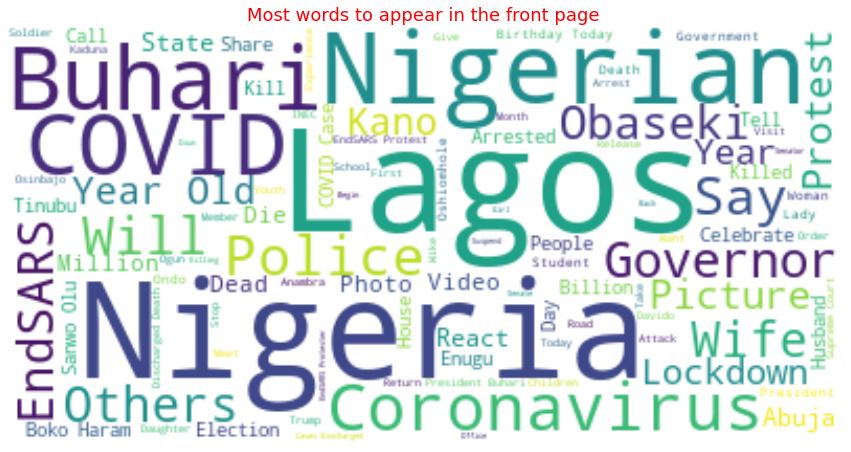

In [23]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in bb)
wordcloud = WordCloud(max_words=100, background_color="White").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most words to appear in the front page ',fontsize=18,color='Red')
plt.show()

Check my dashboard in tableau https://public.tableau.com/profile/chinonso.ekwo#!/vizhome/Nairaland